In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
import glob
import sys
import os

In [15]:
datasets_list=['01_2013-2014_-_2017-_2018_Demographic_Snapshot_Citywide.csv','03_2013_-_2018_Demographic_Snapshot_Borough.csv']
attributes_list=['Total Enrollment','% Asian']
mydict1={}
for filename in glob.glob('*.csv'):
    mydict={}
    if(filename in datasets_list):
        data=pd.read_csv(filename)
        for col in data.columns:
            #print (col)
            if col in attributes_list:
                    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
                    numerical_vars = list(data.select_dtypes(include=numerics).columns)
                    data = data[numerical_vars]
                    lab=[col]
                    #print(data[col])
                    # separate train and test sets
                    X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=lab, axis=1),data[col],test_size=0.1,random_state=0)
                    mi = mutual_info_regression(X_train.fillna(0), y_train)
                    mi = pd.Series(mi)
                    mi.index = X_train.columns
                    mi.sort_values(ascending=False)
                    mydict[col]=mi.to_dict()
        mydict1[filename]=mydict
mydict1

{'01_2013-2014_-_2017-_2018_Demographic_Snapshot_Citywide.csv': {'Total Enrollment': {'Grade PK (Half Day & Full Day)': 0.0,
   'Grade K': 0.0,
   'Grade 1': 0.0,
   'Grade 2': 0.0,
   'Grade 3': 0.0,
   'Grade 4': 0.0,
   'Grade 5': 0.0,
   'Grade 6': 0.0,
   'Grade 7': 0.0,
   'Grade 8': 0.0,
   'Grade 9': 0.0,
   'Grade 10': 0.0,
   'Grade 11': 0.0,
   'Grade 12': 0.0,
   '# Female': 0.0,
   '% Female': 0.0,
   '# Male': 2.220446049250313e-16,
   '% Male': 0.0,
   '# Asian': 0.0,
   '% Asian': 0.0,
   '# Black': 0.0,
   '% Black': 0.0,
   '# Hispanic': 0.0,
   '% Hispanic': 0.0,
   '# Multiple Race Categories Not Represented': 0.0,
   '% Multiple Race Categories Not Represented': 0.0,
   '# White': 0.0,
   '% White': 0.0,
   '# Students with Disabilities': 0.0,
   '% Students with Disabilities': 0.0,
   '# English Language Learners': 0.0,
   '% English Language Learners': 0.0,
   '# Poverty': 0.0,
   '% Poverty': 0.0,
   'Economic Need Index': 0.0},
  '% Asian': {'Total Enrollment':

In [16]:
for datasets in mydict1:
    for attributes in mydict1[datasets]:
        print (datasets,"------------",attributes,"\n",mydict1[datasets][attributes])


01_2013-2014_-_2017-_2018_Demographic_Snapshot_Citywide.csv ------------ Total Enrollment 
 {'Grade PK (Half Day & Full Day)': 0.0, 'Grade K': 0.0, 'Grade 1': 0.0, 'Grade 2': 0.0, 'Grade 3': 0.0, 'Grade 4': 0.0, 'Grade 5': 0.0, 'Grade 6': 0.0, 'Grade 7': 0.0, 'Grade 8': 0.0, 'Grade 9': 0.0, 'Grade 10': 0.0, 'Grade 11': 0.0, 'Grade 12': 0.0, '# Female': 0.0, '% Female': 0.0, '# Male': 2.220446049250313e-16, '% Male': 0.0, '# Asian': 0.0, '% Asian': 0.0, '# Black': 0.0, '% Black': 0.0, '# Hispanic': 0.0, '% Hispanic': 0.0, '# Multiple Race Categories Not Represented': 0.0, '% Multiple Race Categories Not Represented': 0.0, '# White': 0.0, '% White': 0.0, '# Students with Disabilities': 0.0, '% Students with Disabilities': 0.0, '# English Language Learners': 0.0, '% English Language Learners': 0.0, '# Poverty': 0.0, '% Poverty': 0.0, 'Economic Need Index': 0.0}
01_2013-2014_-_2017-_2018_Demographic_Snapshot_Citywide.csv ------------ % Asian 
 {'Total Enrollment': 0, 'Grade PK (Half Day & 

In [17]:
# let's add the variable names and order the features
# according to the MI for clearer visualisation
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

# Female                                      1.728692
# Black                                       1.728692
Total Enrollment                              1.724904
# Male                                        1.724904
Grade 7                                       1.721116
Grade 2                                       1.713541
# Hispanic                                    1.698389
Grade K                                       1.698389
Grade 3                                       1.698389
Grade 5                                       1.694601
Grade 1                                       1.679450
% Black                                       1.677934
Grade 8                                       1.675662
Grade 6                                       1.671874
# Asian                                       1.669547
Grade 4                                       1.660510
Grade 11                                      1.656722
# White                                       1.636214
Grade 12  

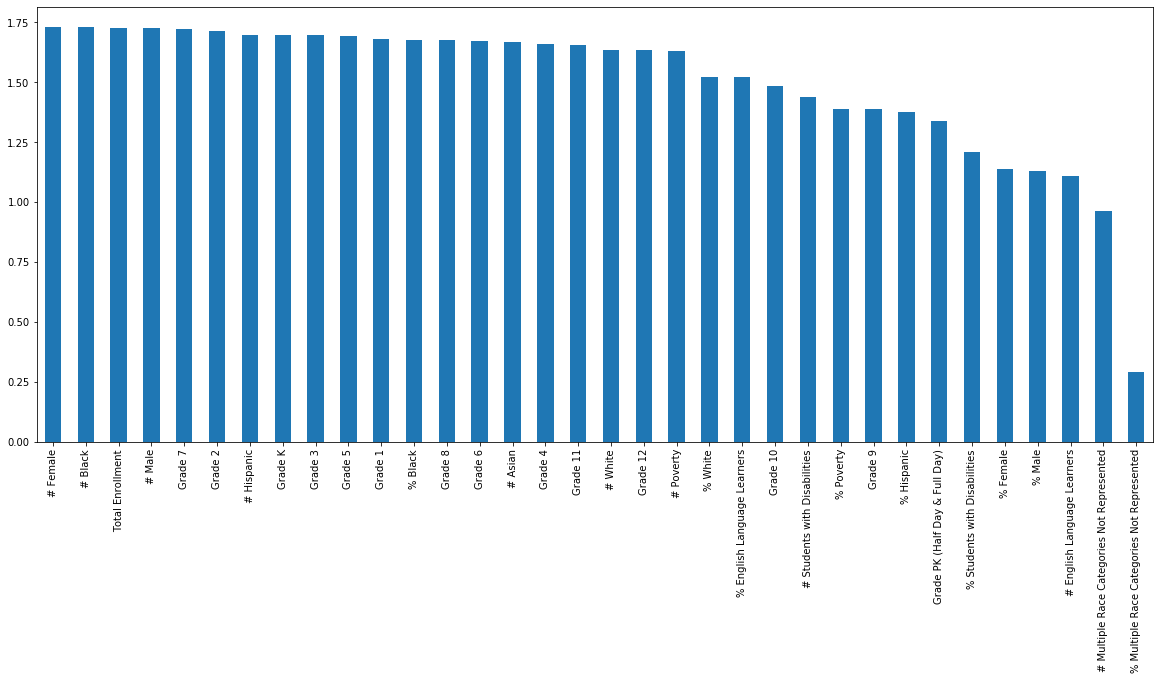

In [8]:
# and now let's plot the ordered MI values per feature
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))